# Analyzing data that is in specific shapes

## Import cell and prepare data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statistics

In [8]:
# for files that lack a column title row, assume the row used for column names is the first row
def add_df_col_title(dataframe, col_title_list):
    col_list = list(dataframe.columns)
    new_row = []
    for i in col_list:
        new_row.append(float(i)) #get row as floats instead of strings
        
    dataframe.loc[-1] = new_row  # adding a row
    dataframe.index = dataframe.index + 1  # shifting index
    dataframe = dataframe.sort_index()  # sorting by index
    
    dataframe.columns = col_title_list
    
    return dataframe

In [9]:
# basic_data_1 has time, longitude, latitude, altitude, roll, pitch, heading, and timestamp in that order
basic_data_1 = pd.read_csv('data/sample_flight_sim.csv')
print(basic_data_1)

# basic_data_2 has radius and subtend angle, will need to be adjusted so columns are proper length
basic_data_2 = pd.read_csv('data/sample_circleandcones_geometries.csv')
basic_data_2 = add_df_col_title(basic_data_2,['radius','subtendAngle'])
print(basic_data_2)

# basic_data_3 has major axis and minor axis, will need to be adjusted so columns are proper length
basic_data_3 = pd.read_csv('data/sample_ellipses_geometries.csv')
basic_data_3 = add_df_col_title(basic_data_3,['sMajor','sMinor'])
print(basic_data_3)

         Time   Longitude   Latitude   Altitude      Roll     Pitch  \
0     56.1667 -157.943156  21.325247  23.924636 -0.050059 -0.231505   
1     57.1667 -157.943156  21.325247  23.924636 -0.050059 -0.231505   
2     58.1667 -157.943156  21.325247  23.924636 -0.050059 -0.231505   
3     59.1667 -157.943156  21.325247  23.924636 -0.050058 -0.231505   
4     60.1667 -157.943156  21.325247  23.924636 -0.050058 -0.231504   
..        ...         ...        ...        ...       ...       ...   
509  565.1500 -157.146378  21.618192   0.856436  0.209368  1.226675   
510  566.1500 -157.146378  21.618192   0.856585  0.199012  1.226241   
511  567.1500 -157.146378  21.618192   0.856532  0.187062  1.226234   
512  568.1580 -157.146378  21.618192   0.853847  0.166287  1.267142   
513  569.1580 -157.146378  21.618192   0.853540  0.150493  1.267113   

        Heading  
0     89.869063  
1     89.869063  
2     89.869063  
3     89.869063  
4     89.869063  
..          ...  
509  294.752005  
510

## Circles

### Organize data

In [13]:
# Creating dataframe to use; requires latitude, longitude, and radius
circle_df_data = [basic_data_1, basic_data_2.radius]
circle_df = pd.concat(circle_df_data, axis=1)
print(circle_df)

         Time   Longitude   Latitude   Altitude      Roll     Pitch  \
0     56.1667 -157.943156  21.325247  23.924636 -0.050059 -0.231505   
1     57.1667 -157.943156  21.325247  23.924636 -0.050059 -0.231505   
2     58.1667 -157.943156  21.325247  23.924636 -0.050059 -0.231505   
3     59.1667 -157.943156  21.325247  23.924636 -0.050058 -0.231505   
4     60.1667 -157.943156  21.325247  23.924636 -0.050058 -0.231504   
..        ...         ...        ...        ...       ...       ...   
509  565.1500 -157.146378  21.618192   0.856436  0.209368  1.226675   
510  566.1500 -157.146378  21.618192   0.856585  0.199012  1.226241   
511  567.1500 -157.146378  21.618192   0.856532  0.187062  1.226234   
512  568.1580 -157.146378  21.618192   0.853847  0.166287  1.267142   
513  569.1580 -157.146378  21.618192   0.853540  0.150493  1.267113   

        Heading    radius  
0     89.869063  0.066869  
1     89.869063  0.066869  
2     89.869063  0.066869  
3     89.869063  0.066869  
4     8

### Statistics

In [18]:
circle_df.describe()

,Time,Longitude,Latitude,Altitude,Roll,Pitch,Heading,radius
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,312.652018,-157.498847,21.435290,6319.250868,-4.055776,3.093995,97.081896,0.073917
std,148.523244,0.296740,0.125662,6342.488963,26.612566,14.345711,75.732378,0.014453
min,56.166700,-157.943156,21.255972,-1.506947,-174.710279,-26.009308,0.188125,0.050339
25%,184.392000,-157.809662,21.323390,1732.962551,-7.002805,-4.415485,59.148583,0.061226
50%,312.642000,-157.449599,21.414010,4159.184322,-0.918908,-0.262823,66.480497,0.071829
75%,440.908000,-157.206780,21.566172,10869.837617,0.223650,6.907127,98.040186,0.085107
max,569.158000,-157.141721,21.618192,22163.441350,141.291001,55.296844,355.082565,0.099887


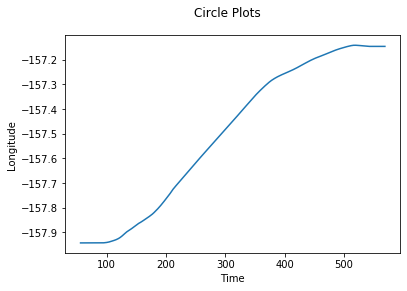

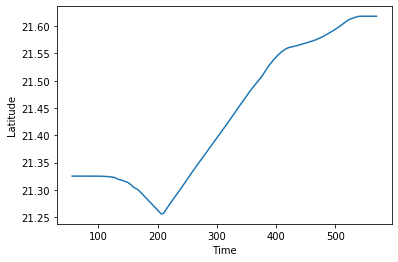

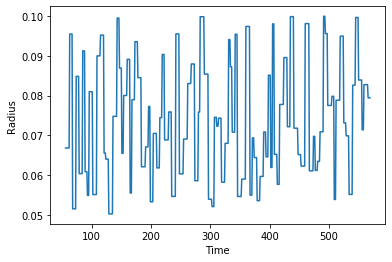

In [30]:
def circle_plots(data, col_list):
    fig1, ax1 = plt.subplots(sharex=True)
    ax1.plot(data[col_list[0]], data[col_list[1]])
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Longitude')
    
    fig2, ax2 = plt.subplots(sharex=True)
    ax2.plot(data[col_list[0]], data[col_list[2]])
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Latitude')
    
    fig3, ax3 = plt.subplots(sharex=True)
    ax3.plot(data[col_list[0]], data[col_list[3]])
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Radius')
    
    fig1.suptitle('Circle Plots')
    plt.show()
    
circle_plots(circle_df, ['Time', 'Longitude', 'Latitude', 'radius'])

## Cones

### Organize data

In [11]:
# Creating dataframe to use; requires latitude, longitude, radius, and subtend angle
cone_df_data = [basic_data_1, basic_data_2]
cone_df = pd.concat(cone_df_data, axis=1)
print(cone_df)

         Time   Longitude   Latitude   Altitude      Roll     Pitch  \
0     56.1667 -157.943156  21.325247  23.924636 -0.050059 -0.231505   
1     57.1667 -157.943156  21.325247  23.924636 -0.050059 -0.231505   
2     58.1667 -157.943156  21.325247  23.924636 -0.050059 -0.231505   
3     59.1667 -157.943156  21.325247  23.924636 -0.050058 -0.231505   
4     60.1667 -157.943156  21.325247  23.924636 -0.050058 -0.231504   
..        ...         ...        ...        ...       ...       ...   
509  565.1500 -157.146378  21.618192   0.856436  0.209368  1.226675   
510  566.1500 -157.146378  21.618192   0.856585  0.199012  1.226241   
511  567.1500 -157.146378  21.618192   0.856532  0.187062  1.226234   
512  568.1580 -157.146378  21.618192   0.853847  0.166287  1.267142   
513  569.1580 -157.146378  21.618192   0.853540  0.150493  1.267113   

        Heading    radius  subtendAngle  
0     89.869063  0.066869     25.877888  
1     89.869063  0.066869     25.877888  
2     89.869063  0.06

### Statistics

In [19]:
cone_df.describe()

,Time,Longitude,Latitude,Altitude,Roll,Pitch,Heading,radius,subtendAngle
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,312.652018,-157.498847,21.435290,6319.250868,-4.055776,3.093995,97.081896,0.073917,30.558999
std,148.523244,0.296740,0.125662,6342.488963,26.612566,14.345711,75.732378,0.014453,2.933562
min,56.166700,-157.943156,21.255972,-1.506947,-174.710279,-26.009308,0.188125,0.050339,25.068710
25%,184.392000,-157.809662,21.323390,1732.962551,-7.002805,-4.415485,59.148583,0.061226,28.560894
50%,312.642000,-157.449599,21.414010,4159.184322,-0.918908,-0.262823,66.480497,0.071829,30.870573
75%,440.908000,-157.206780,21.566172,10869.837617,0.223650,6.907127,98.040186,0.085107,33.167640
max,569.158000,-157.141721,21.618192,22163.441350,141.291001,55.296844,355.082565,0.099887,34.889688


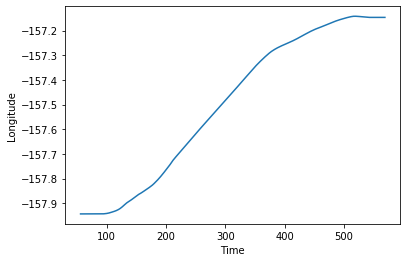

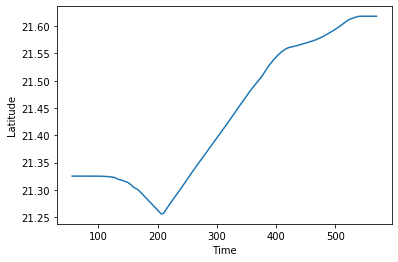

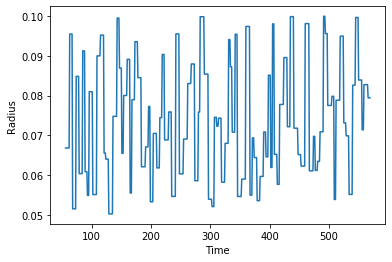

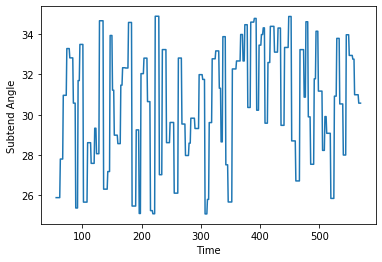

In [26]:
def cone_plots(data, col_list):
    fig1, ax1 = plt.subplots(sharex=True)
    ax1.plot(data[col_list[0]], data[col_list[1]])
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Longitude')
    
    fig2, ax2 = plt.subplots(sharex=True)
    ax2.plot(data[col_list[0]], data[col_list[2]])
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Latitude')
    
    fig3, ax3 = plt.subplots(sharex=True)
    ax3.plot(data[col_list[0]], data[col_list[3]])
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Radius')
    
    fig4, ax4 = plt.subplots(sharex=True)
    ax4.plot(data[col_list[0]], data[col_list[4]])
    ax4.set_xlabel('Time')
    ax4.set_ylabel('Subtend Angle')
    
    fig1.suptitle('Cone Plots')
    plt.show()
    
cone_plots(cone_df, ['Time', 'Longitude', 'Latitude', 'radius', 'subtendAngle'])

## Ellipses

### Organize data

In [12]:
# Creating dataframe to use; requires latitude, longitude, orientation(heading), and axes(semi-major and semi-minor)
ellipse_df_data = [basic_data_1, basic_data_3]
ellipse_df = pd.concat(ellipse_df_data, axis=1)
print(ellipse_df)

         Time   Longitude   Latitude   Altitude      Roll     Pitch  \
0     56.1667 -157.943156  21.325247  23.924636 -0.050059 -0.231505   
1     57.1667 -157.943156  21.325247  23.924636 -0.050059 -0.231505   
2     58.1667 -157.943156  21.325247  23.924636 -0.050059 -0.231505   
3     59.1667 -157.943156  21.325247  23.924636 -0.050058 -0.231505   
4     60.1667 -157.943156  21.325247  23.924636 -0.050058 -0.231504   
..        ...         ...        ...        ...       ...       ...   
509  565.1500 -157.146378  21.618192   0.856436  0.209368  1.226675   
510  566.1500 -157.146378  21.618192   0.856585  0.199012  1.226241   
511  567.1500 -157.146378  21.618192   0.856532  0.187062  1.226234   
512  568.1580 -157.146378  21.618192   0.853847  0.166287  1.267142   
513  569.1580 -157.146378  21.618192   0.853540  0.150493  1.267113   

        Heading    sMajor    sMinor  
0     89.869063  0.092046  0.028652  
1     89.869063  0.092046  0.028652  
2     89.869063  0.092046  0.0286

### Statistics

In [20]:
ellipse_df.describe()

,Time,Longitude,Latitude,Altitude,Roll,Pitch,Heading,sMajor,sMinor
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,312.652018,-157.498847,21.435290,6319.250868,-4.055776,3.093995,97.081896,0.095437,0.036812
std,148.523244,0.296740,0.125662,6342.488963,26.612566,14.345711,75.732378,0.025887,0.014545
min,56.166700,-157.943156,21.255972,-1.506947,-174.710279,-26.009308,0.188125,0.050446,0.010130
25%,184.392000,-157.809662,21.323390,1732.962551,-7.002805,-4.415485,59.148583,0.077425,0.024302
50%,312.642000,-157.449599,21.414010,4159.184322,-0.918908,-0.262823,66.480497,0.093274,0.036556
75%,440.908000,-157.206780,21.566172,10869.837617,0.223650,6.907127,98.040186,0.115114,0.049462
max,569.158000,-157.141721,21.618192,22163.441350,141.291001,55.296844,355.082565,0.147732,0.059303


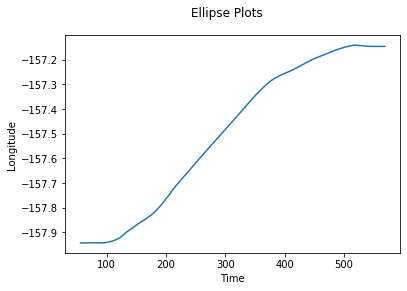

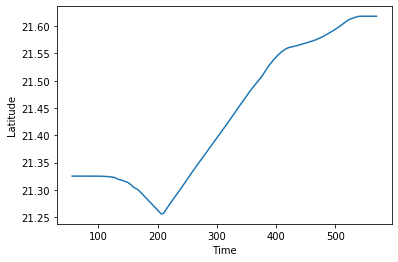

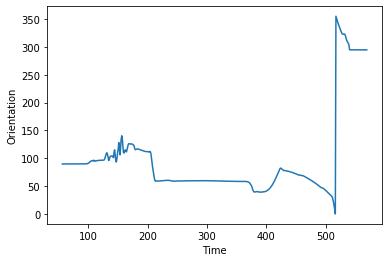

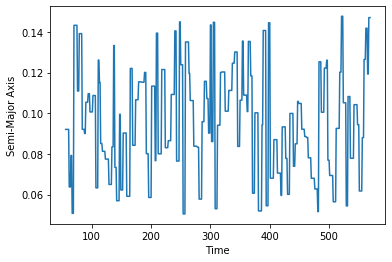

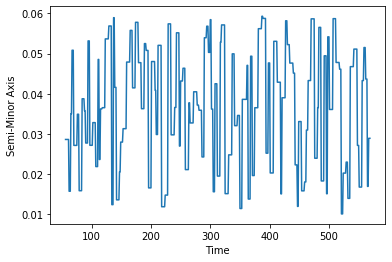

In [29]:
def ellipse_plots(data, col_list):
    fig1, ax1 = plt.subplots(sharex=True)
    ax1.plot(data[col_list[0]], data[col_list[1]])
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Longitude')
    
    fig2, ax2 = plt.subplots(sharex=True)
    ax2.plot(data[col_list[0]], data[col_list[2]])
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Latitude')
    
    fig3, ax3 = plt.subplots(sharex=True)
    ax3.plot(data[col_list[0]], data[col_list[3]])
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Orientation')
    
    fig4, ax4 = plt.subplots(sharex=True)
    ax4.plot(data[col_list[0]], data[col_list[4]])
    ax4.set_xlabel('Time')
    ax4.set_ylabel('Semi-Major Axis')
    
    fig5, ax5 = plt.subplots(sharex=True)
    ax5.plot(data[col_list[0]], data[col_list[5]])
    ax5.set_xlabel('Time')
    ax5.set_ylabel('Semi-Minor Axis')
    
    fig1.suptitle('Ellipse Plots')
    plt.show()
    
ellipse_plots(ellipse_df, ['Time', 'Longitude', 'Latitude', 'Heading', 'sMajor', 'sMinor'])